### Requests 사용법

In [1]:
# 서버에 페이지 정보를 요정할때 사용하는 라이브러리

import requests as req

In [2]:
url = "https://www.naver.com/"
res = req.get(url)
# response[200] 잘 응답되었습니다.

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
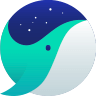
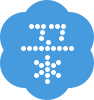

In [3]:
# 요청한 정보의 페이지를 보기
res.text

### Melon 홈페이지 정보 가져오기

In [4]:
m_url = "https://www.melon.com/"
res = req.get(m_url)
# 406 => 요청을 거부했다.

In [5]:
res

<Response [406]>

In [6]:
# 컴퓨터가 아닌 사람으로 속이는 작업(headers)
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}

In [7]:
res = req.get(m_url, headers = h)

In [8]:
res.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>Melon::음악이 필요한 순간, 멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 실시간 차트부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="f13fc46b807bef984aa341efeb1adec8de12264c"/>\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론"/>\r\n\t<meta property="og:url" content="http://www.melon.com/"/>\r\n\t<meta pro

### BeautifulSoup 사용하기
- 가져온 데이터에서 내가 원하는 내용만 추출할때 사용

In [9]:
!pip install beautifulsoup4

In [10]:
from bs4 import BeautifulSoup as bs

In [11]:
# bs(어떤걸 가공할건지 . 어떻게 가공할건지 - 파싱방법)
soup = bs(res.text, 'lxml')

In [12]:
# find_all = 특정 데이터를 모두 찾아오는 기능(태그, 클래스/아이디)
result = soup.find_all('a', class_ = 'nav')

In [13]:
result[2].text

IndexError: list index out of range

In [ ]:
for i in result:
    print(i.text)

### 코로나 뉴스 제목 가져오기

In [ ]:
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%BD%94%EB%A1%9C%EB%82%98"
res = req.get(url)

In [ ]:
soup = bs(res.text, 'lxml')

In [ ]:
result = soup.find_all('a', class_ = 'news_tit')

In [ ]:
for i in result:
    print(i.text)

### soup.select

In [ ]:
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EA%B8%B0%EC%95%84&oquery=%EC%BD%94%EB%A1%9C%EB%82%98&tqi=U%2BwPEdprvmssscbnuqlssssssvR-112728"
res = req.get(url)

In [ ]:
soup = bs(res.text, 'lxml')

In [ ]:
result = soup.select('.news_tit')

In [ ]:
for i in result:
    print(i.text)

### 네이버 영화 평점 순위 가져오기

In [ ]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201229"
res = req.get(url)
soup = bs(res.text, 'lxml')
result = soup.select('.tit5')

for i in result:
    print(i.text.strip())
# .strip 을 쓰면 줄 바꿔쓰기를 없앨수 있다.

### 평점 가져오기

In [ ]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201229"
res = req.get(url)
soup = bs(res.text, 'lxml')
result = soup.select('.point')

for i in result:
    print(i.text)

### 데이터프레임 만들기

In [ ]:
import pandas as pd

In [ ]:
result = soup.select('.tit5 > a')
result2 = soup.select('.point')

In [ ]:
title_list = []
rate_list = []
rank_list = []

for i in range(len(result)):
    title_list.append(result[i].text)
    rate_list.append(result2[i].text)
    rank_list.append(i+1)

In [ ]:
movie_dic = {'순위' : rank_list, '영화명' : title_list, '평점' : rate_list}

In [ ]:
movie = pd.DataFrame(movie_dic)

In [ ]:
# 특정 컬럼을 index로 바꾸기
# inplace 는 바로 변화를 저장해주는 기능
movie.set_index('순위', inplace = True)

In [ ]:
movie

### 멜론 차트 정보 가져오기

In [16]:
m_url = "https://www.melon.com/chart/index.htm"
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}
res = req.get(m_url, headers = h)
soup = bs(res.text, 'lxml')
result = soup.select('span>a')
result2 = soup.select('.rank2 > a')

In [17]:
for i in result2:
    print(i.text)

- day 2 에 이어짐